In [1]:
"""
# Copyright (C) 2024 Jesús Bautista Villar <jesbauti20@gmail.com>
"""
!python3 -V || python -V

Python 3.11.4


In [1]:
from _requirements import *

## Formations in $\mathbb{C}^1$ - Complex laplacian 

### Square

In [2]:
## Parameters #####
Z = ((1,2), (2,3), (3,4), (4,1))
p_star = [0-1j, 1+0j, 0+1j, -1+0j] # square
p0 = [-10-1j, 4-2j, 0+4j, -0.5+0.5j]
tf = 4
h = 5
kappa = 1

## Generate the simulation frame #####
args = {"Z":Z, "p_star":p_star, "p0":p0, "tf":tf, "h":h, "kappa":kappa, "p1":(1 + 2j)}
sim_fr = ComplexSimulator(**args)

Executing numerical simulation: 100%|██████████| 4000/4000 [00:00<00:00, 166703.59it/s]


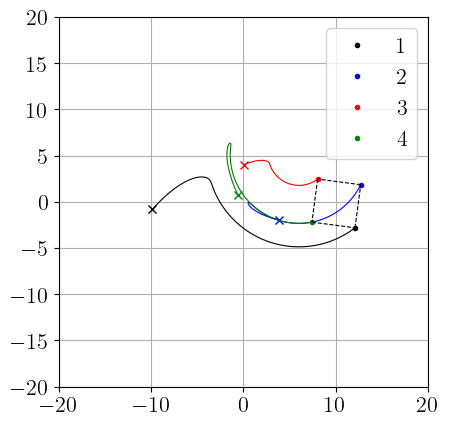

In [3]:
## Launch the simulation and plot #####
sim_fr.set_velocity(1, 0, 0, 0.5)

sim_fr.numerical_simulation()
sim_fr.plot()

### Line

In [11]:
## Parameters #####
Z = ((1,2), (2,3), (3,4), (4,1))
p_star = [-2+0j, -1+0j, 1+0j, 2+0j] # square
p0 = [-10-1j, 4-2j, 0+4j, -0.5+0.5j]
tf = 5
h = 1
kappa = 1

## Generate the simulation frame #####
args = {"Z":Z, "p_star":p_star, "p0":p0, "tf":tf, "h":h, "kappa":kappa, "p1":-2}
sim_fr = ComplexSimulator(**args)

Executing numerical simulation: 100%|██████████| 5000/5000 [00:00<00:00, 169527.10it/s]


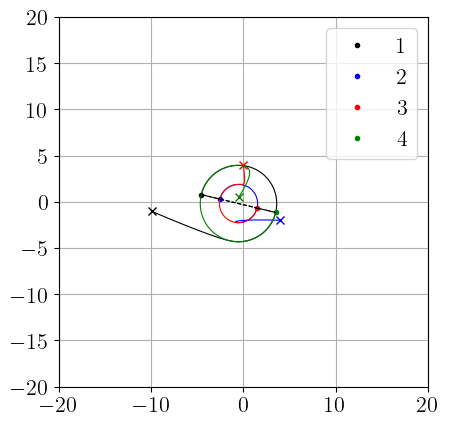

In [12]:
## Launch the simulation and plot #####
sim_fr.set_velocity(0, 0, 0, 1)

sim_fr.numerical_simulation()
sim_fr.plot()

## Affine formations in $R^2$

### Square

In [3]:
## Parameters #####
Z = ((1,2), (1,3), (2,3), (2,4), (3,4), (4,1))
p_star = [[-1,-1], [-1,1], [1,1], [1,-1]] # square
p0 = [[-10,-3], [-5,-2], [10,4], [0,-5]]
tf = 2
h = 4
kappa=0.01

## Generate the simulation frame #####
args = {"Z":Z, "p_star":p_star, "p0":p0, "tf":tf, "h":h, "kappa":kappa}
sim_fr = AffineSimulator(**args)

Failed to dualize the problem: 'float' object is not iterable


In [4]:
## Set a desired velocity vector stack (v_f^*) #####
vx = 0
vy = -40
a = 0

omega = 0
hx = 0
hy = 0

# "a" case
# omega = 1
# hx = 4
# hy = 2

# "b" case
# omega = -3
# hx = -4
# hy = 2

## Design the weights that gerenates such v_f^* #####
mu_matrix_x = np.array([[0,0,0,-1], [0,0,-1,0], [0,1,0,0], [1,0,0,0]])/2
mu_matrix_y = np.array([[0,-1,0,0], [1,0,0,0], [0,0,0,1], [0,0,-1,0]])/2

mu_matrix_a = np.array([[0,1,0,1], [1,0,1,0], [0,1,0,1], [1,0,1,0]])/2
mu_matrix_w = np.array([[0,1,0,-1], [-1,0,1,0], [0,-1,0,1], [1,0,-1,0]])/2
mu_matrix_hx = np.array([[0,0,0,1], [0,0,-1,0], [0,1,0,0], [-1,0,0,0]])/2
mu_matrix_hy = np.array([[0,1,0,0], [-1,0,0,0], [0,0,0,1], [0,0,-1,0]])/2

sim_fr.set_manual_mu(vx*mu_matrix_x + vy*mu_matrix_y + a*mu_matrix_a + omega*mu_matrix_w + 
                     hx*mu_matrix_hx + hy*mu_matrix_hy)

Executing numerical simulation: 100%|██████████| 2000/2000 [00:00<00:00, 137925.16it/s]
d:\Workspace\repos\affine_formations\notebooks\..\afc\simulators\affine_simulator.py:117: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


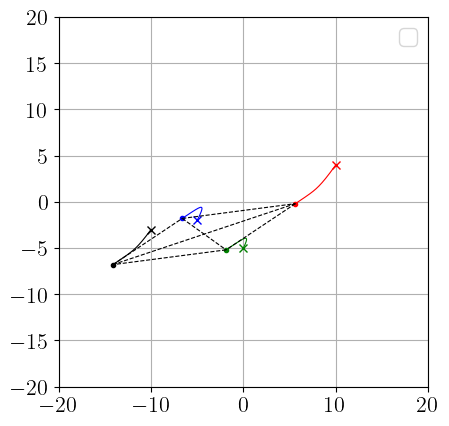

In [5]:
## Launch the simulation and plot #####
#sim_fr.set_velocity(0, 0, 0, 1)

sim_fr.numerical_simulation()
sim_fr.plot()

## Affine formations in $\mathbb{C}^1$

### Square

In [3]:
## Parameters #####
Z = ((1,2), (1,3), (2,3), (2,4), (3,4), (4,1))
p_star = np.array([[-1,-1], [-1,1], [1,1], [1,-1]]) # square
p0 = [[-10,-4], [-1,0], [2,1], [2,-1]]
tf = 10
h = 10
kappa = 0.1

## Generate the simulation frame #####
args = {"Z":Z, "p_star":p_star, "p0":p0, "tf":tf, "h":h, "kappa":kappa}
sim_fr = AffineComplexSimulator(**args)

Failed to dualize the problem: 'float' object is not iterable


In [8]:
## Set a desired velocity vector stack (v_f^*) #####

# mu_ij weights for the given p_star and Z --------------------------------------------
def get_mu_matrix(params):
    mu_matrix_x = np.array([[0,0,0,-1], [0,0,-1,0], [0,1,0,0], [1,0,0,0]])/2
    mu_matrix_y = np.array([[0,-1,0,0], [1,0,0,0], [0,0,0,1], [0,0,-1,0]])/2

    mu_matrix_ax = np.array([[0,0,0,1], [0,0,1,0], [0,1,0,0], [1,0,0,0]])/2
    mu_matrix_ay = np.array([[0,1,0,0], [1,0,0,0], [0,0,0,1], [0,0,1,0]])/2
    mu_matrix_w = np.array([[0,1,0,-1], [-1,0,1,0], [0,-1,0,1], [1,0,-1,0]])/2
    mu_matrix_hx = np.array([[0,0,0,1], [0,0,-1,0], [0,1,0,0], [-1,0,0,0]])/2
    mu_matrix_hy = np.array([[0,1,0,0], [-1,0,0,0], [0,0,0,1], [0,0,-1,0]])/2

    vx, vy, ax, ay, omega, hx, hy = params

    M = vx*mu_matrix_x + vy*mu_matrix_y + ax*mu_matrix_ax + ay*mu_matrix_ay
    M += omega*mu_matrix_w + hx*mu_matrix_hx + hy*mu_matrix_hy
    return M
# -------------------------------------------------------------------------------------

params_deg_c1 = [0, 0, 0, 0, 0, 2, 0]

params = params_deg_c1
sim_fr.set_manual_mu(get_mu_matrix(params))

Executing numerical simulation: 100%|██████████| 10000/10000 [00:00<00:00, 95953.59it/s]


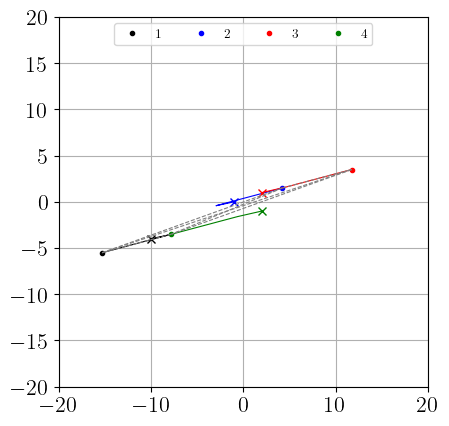

In [9]:
## Launch the simulation and plot #####
sim_fr.numerical_simulation()
sim_fr.plot()

### Trapezoid

In [9]:
## Parameters #####
Z = ((1,2), (1,3), (2,3), (2,4), (3,4), (4,1))
p_star = np.array([[-1,-1], [-2,2], [2,2], [1,-1]]) # square
p0 = [[-10,-3], [-5,-2], [10,4], [0,-5]]
tf = 1
h = 3
kappa = 0.1

## Generate the simulation frame #####
args = {"Z":Z, "p_star":p_star, "p0":p0, "tf":tf, "h":h, "kappa":kappa}
sim_fr = AffineComplexSimulator(**args)

Failed to dualize the problem: 'float' object is not iterable


In [10]:
## Set a desired velocity vector stack (v_f^*) #####
vx = -1
vy = -1
a = 0
omega = 0
hx = 0
hy = 0

## Design the weights that gerenates such v_f^* #####
mu_matrix_x = np.array([[0,0,0,-1], [0,0,-1/2,0], [0,1/2,0,0], [1,0,0,0]])/2
mu_matrix_y = np.array([[0,-1,0,-1/2], [1,0,-1/4,0], [0,-1/4,0,1], [-1/2,0,-1,0]])/3

mu_matrix_a = np.array([[0,0,1,0], [0,0,0,2], [2,0,0,0], [0,1,0,0]])/3
mu_matrix_w = np.array([[0,1,0,-1], [-2,0,2,0], [0,-2,0,2], [1,0,-1,0]])/3
mu_matrix_hx = np.array([[0,0,0,1], [0,0,-2/2,0], [0,2/2,0,0], [-1,0,0,0]])/2
mu_matrix_hy = -np.array([[0,-1,0,-1/2], [2,0,-2/4,0], [0,2/4,0,-2], [1/2,0,1,0]])/3

sim_fr.set_manual_mu(vx*mu_matrix_x + vy*mu_matrix_y + a*mu_matrix_a + omega*mu_matrix_w + 
                     hx*mu_matrix_hx + hy*mu_matrix_hy)

Executing numerical simulation: 100%|██████████| 1000/1000 [00:00<00:00, 48780.62it/s]


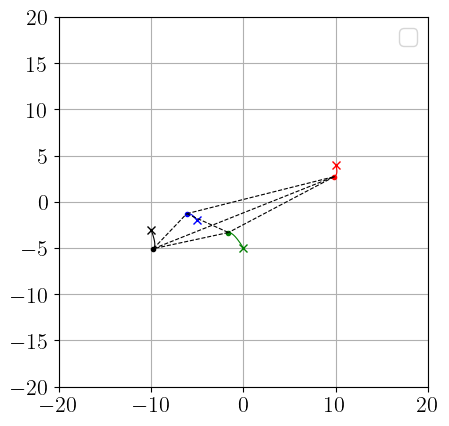

In [12]:
## Launch the simulation and plot #####
sim_fr.numerical_simulation()
sim_fr.plot()